In [12]:
import os
import pandas as pd
from Utility_Classes.data_preprocessing import Preprocessor
from Utility_Classes.logger import App_Logger
from Utility_Classes.clustering import KMeansClustering
import pickle

In [13]:
filepath = r'Prediction_Batch_Files'

##############################Data Loading##############################
#Load all the csv files from the path specified
file_list = []
for input_file in os.listdir(filepath):
    if input_file.endswith('csv'):       
        file_list.append(input_file)
file_list

['creditCardFraud_28011960_120210.csv',
 'creditCardFraud_28011961_12.csv',
 'creditCardFraud_28011962_120212.csv',
 'creditCardFraud_28011963_120213.csv']

In [16]:
for file in file_list:
    df = pd.read_csv(os.path.join(filepath,file))
    print(df.shape)

(1001, 23)
(1001, 24)
(1001, 23)
(1001, 24)


In [18]:
df1 = pd.read_csv(os.path.join(filepath,'creditCardFraud_28011960_120210.csv'))
df1.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')

In [19]:
df2 = pd.read_csv(os.path.join(filepath,'creditCardFraud_28011961_12.csv'))
df2.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [21]:
columns_to_load = ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
df3 = pd.read_csv(os.path.join(filepath,'creditCardFraud_28011961_12.csv'), usecols=columns_to_load)
df3.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')

In [26]:
df3.isnull().sum() == df3.shape[1]

LIMIT_BAL    False
SEX          False
EDUCATION    False
MARRIAGE     False
AGE          False
PAY_0        False
PAY_2        False
PAY_3        False
PAY_4        False
PAY_5        False
PAY_6        False
BILL_AMT1    False
BILL_AMT2    False
BILL_AMT3    False
BILL_AMT4    False
BILL_AMT5    False
BILL_AMT6    False
PAY_AMT1     False
PAY_AMT2     False
PAY_AMT3     False
PAY_AMT4     False
PAY_AMT5     False
PAY_AMT6     False
dtype: bool

In [7]:
##############################Data Preprocessing##############################
#Encode 'SEX' column as binary just to make it more readable
df['SEX_MALE'] = df['SEX'].map(lambda x: 1 if x== 1 else 0)
df.drop('SEX', inplace=True, axis = 1)



logfile =  open(r'Logs/prediction_log.log', 'a+')
pre_obj = Preprocessor(logfile, App_Logger())

#Scale the numerical columns using StandardScaler
numerical_columns_to_scale = ['LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2',
                            'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
                            'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
                            'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
scaled_numeric_df = pre_obj.scale_numerical_columns(df, numerical_columns_to_scale)

#Get dummy variables for the catagorical columns
cat_columns_to_encode = ['EDUCATION', 'MARRIAGE']
df_dummies = pre_obj.encode_categorical_columns(df, cat_columns_to_encode)

#Reset index
df_dummies = df_dummies.reset_index(drop=True)
scaled_numeric_df = scaled_numeric_df.reset_index(drop=True)

#Combine catagorical and numeric features
df_combined= pd.concat([df_dummies, scaled_numeric_df], axis=1)


x = df_combined.copy()
x.head()

,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_6,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,LIMIT_BAL,AGE,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,1,0,0,0,0,1,0,0,-1.127993,-1.187280,...,-0.637343,-0.598082,-0.620008,-0.603773,-0.441471,-0.279213,-0.398375,-0.352187,-0.317337,-0.215512
1,1,0,0,0,0,0,1,0,-0.361695,-0.970278,...,-0.608664,-0.550074,-0.565214,-0.552032,-0.441471,-0.259301,-0.302442,-0.276790,-0.317337,-0.130932
2,1,0,0,0,0,0,1,0,-0.591584,-0.102269,...,-0.452147,-0.387810,-0.382942,-0.357066,-0.316781,-0.227288,-0.302442,-0.276790,-0.257827,-0.004063
3,1,0,0,0,0,1,0,0,-0.898104,0.223235,...,0.062027,-0.182644,-0.160735,-0.134968,-0.277189,-0.194058,-0.283255,-0.269250,-0.253721,-0.173222
4,1,0,0,0,0,1,0,0,-0.898104,2.393258,...,-0.131601,-0.290839,-0.316364,-0.300232,-0.277189,2.025233,0.560956,0.326390,-0.276335,-0.186797


,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_6,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,LIMIT_BAL,AGE,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Cluster
0,1,0,0,0,0,1,0,0,-1.127993,-1.187280,...,-0.598082,-0.620008,-0.603773,-0.441471,-0.279213,-0.398375,-0.352187,-0.317337,-0.215512,2
1,1,0,0,0,0,0,1,0,-0.361695,-0.970278,...,-0.550074,-0.565214,-0.552032,-0.441471,-0.259301,-0.302442,-0.276790,-0.317337,-0.130932,0
2,1,0,0,0,0,0,1,0,-0.591584,-0.102269,...,-0.387810,-0.382942,-0.357066,-0.316781,-0.227288,-0.302442,-0.276790,-0.257827,-0.004063,0
3,1,0,0,0,0,1,0,0,-0.898104,0.223235,...,-0.182644,-0.160735,-0.134968,-0.277189,-0.194058,-0.283255,-0.269250,-0.253721,-0.173222,0
4,1,0,0,0,0,1,0,0,-0.898104,2.393258,...,-0.290839,-0.316364,-0.300232,-0.277189,2.025233,0.560956,0.326390,-0.276335,-0.186797,0


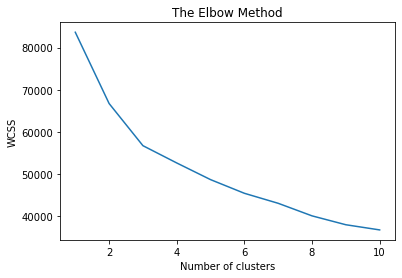

In [8]:
##############################Clustering##############################
km = KMeansClustering(logfile, App_Logger())
num_clusters = km.elbow_plot(x)
data_with_clusters = km.create_clusters(x, num_clusters)
data_with_clusters.head()

In [9]:
##############################Prediction##############################
x_test = data_with_clusters

rf_model = pickle.load(open(r'Saved_Models/RandomForestClassifier.pkl', 'rb'))
xgb_model = pickle.load(open(r'Saved_Models/XGBClassifier.pkl', 'rb'))

y_pred_rf = rf_model.predict(x_test)
y_pred_xgb = xgb_model.predict(x_test)

df_y_pred_rf = pd.DataFrame(y_pred_rf)
df_y_pred_xgb = pd.DataFrame(y_pred_xgb)

df_y_pred_rf.to_csv(r'Prediction_Output_Files/rf_predictions.csv')
df_y_pred_xgb.to_csv(r'Prediction_Output_Files/xgb_predictions.csv')